In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os, sys
import random
import networkx as nx
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import SAD as sad

0.012175997326569536 0.0003086842803894438


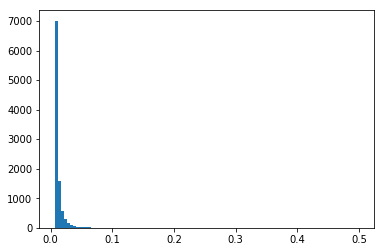

In [3]:
N = 10000
# produce activities 
from scipy.stats import norm,pareto
b = 2.1
dist = pareto(b).rvs(100000)
dist = np.random.choice(dist,N)
act = dict(zip(range(N),dist/(2.0*np.max(dist))))
plt.hist(act.values(),100)
mu, v  = np.mean(act.values()), np.mean(np.array(act.values())**2)
print mu, v

In [4]:
import imp
imp.reload(sad)

<module 'SAD' from 'SAD.pyc'>

# Memoryless graph

In [9]:
N = 1000
T = 500
Tagg = 499;
k = 6

In [43]:
STGa = {}
VTGa = {}
sigmas = np.linspace(0,0.5,5);
for sigma in sigmas:
    VTG,fh = sad.temporal_graph_creation(N,T,[k,k*sigma],act,mode='simplicial',returnhist=True);
    VTGa[sigma] = sad.aggregate_graph(VTG,Tagg)
    tot = []
    for t in fh:
        tot.extend(map(len,fh[t]))
    krenorm = int(round(invert_k(np.mean(map(lambda x: x*(x-1)/2, tot)))))
    print sigma, krenorm
    STG = sad.temporal_graph_creation(N,T,krenorm,act,mode='simplicial')
    STGa[sigma] = sad.aggregate_graph(STG,Tagg)

0.0 6
0.125 6
0.25 6
0.375 6
0.5 6


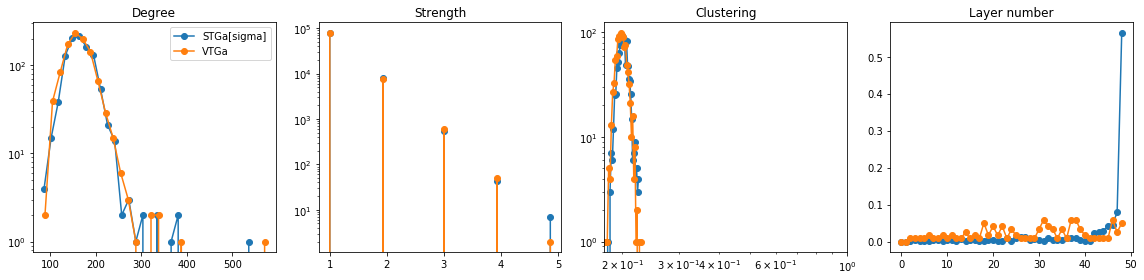

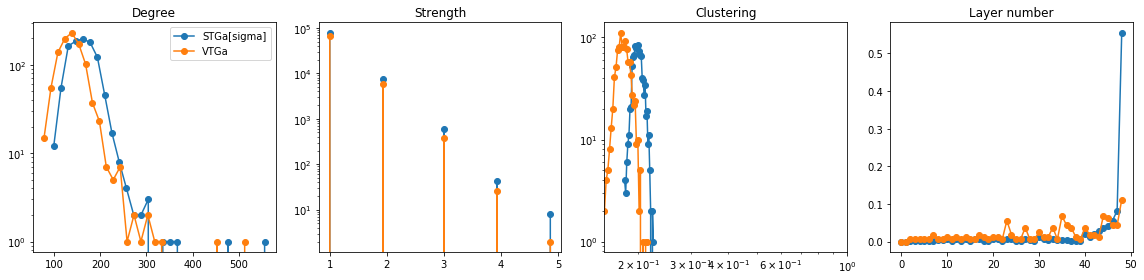

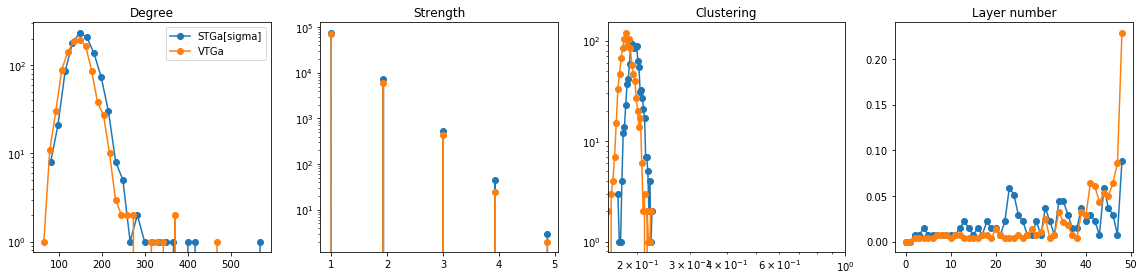

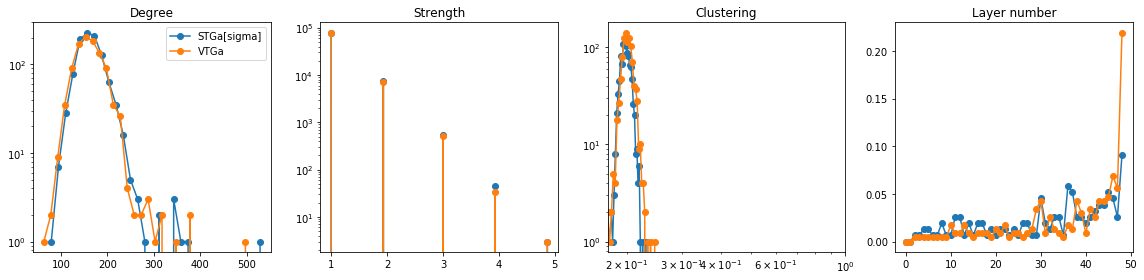

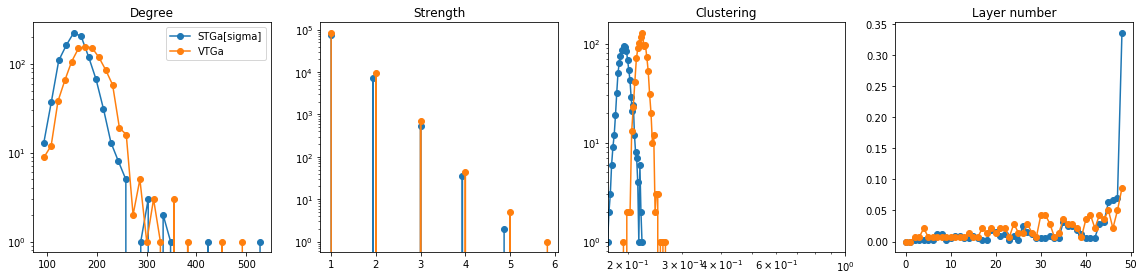

In [44]:
pl = 4 
for sigma in sigmas:
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1,pl,1)
    aa, bb = np.histogram(STGa[sigma].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='STGa[sigma]')
    aa, bb = np.histogram(VTGa[sigma].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='VTGa')
    plt.legend(loc=0)
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Degree')

    plt.subplot(1,pl,2)
    aa, bb = np.histogram(nx.get_edge_attributes(STGa[sigma],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.get_edge_attributes(VTGa[sigma],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Strength')

    plt.subplot(1,pl,3)
    aa, bb = np.histogram(nx.clustering(STGa[sigma]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.clustering(VTGa[sigma]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Clustering')
    plt.xlim(0,1)

    plt.subplot(1,pl,4)
    coreness, layerness = sad.onion_decomposition(STGa[sigma])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    coreness, layerness = sad.onion_decomposition(VTGa[sigma])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    plt.title('Layer number')

    plt.tight_layout()

In [ ]:
x = nx.clustering(VTGa[sigmas[-1]]).values()
y = nx.clustering(STGa[sigmas[-1]]).values()
z = act.values()[:N]
M = np.max([np.max(x), np.max(y)])

fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,c=z,alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Clustering STG',fontsize=30)
plt.xlabel('Clustering NTG', fontsize=30)


# Memory graph 

In [ ]:
import imp
imp.reload(sad)

In [29]:
def invert_k(M):
    return (1.0 + np.sqrt(1 + 8*M))/2.0;

(67.97977062758841, 12.1708843390369)

In [49]:
STGa = {}
VTGa = {}
k = 6;
sigmas = np.linspace(0,1,5);
for sigma in sigmas:
    VTG,fh = sad.memory_temporal_graph_creation(N,T,[k,k*sigma],act,mode='simplicial',alpha=1,returnhist=True);
    VTGa[sigma] = sad.aggregate_graph(VTG,Tagg)
    tot = []
    for t in fh:
        tot.extend(map(len,fh[t]))
    krenorm = int(round(invert_k(np.mean(map(lambda x: x*(x-1)/2, tot)))))
    print sigma, krenorm
    STG = sad.memory_temporal_graph_creation(N,T,krenorm,act,mode='simplicial',alpha=1)
    STGa[sigma] = sad.aggregate_graph(STG,Tagg)

0.0 6
0.25 6
0.5 6
0.75 7
1.0 8


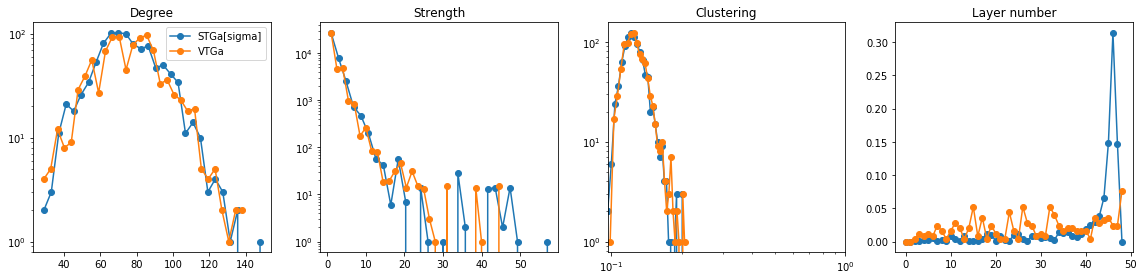

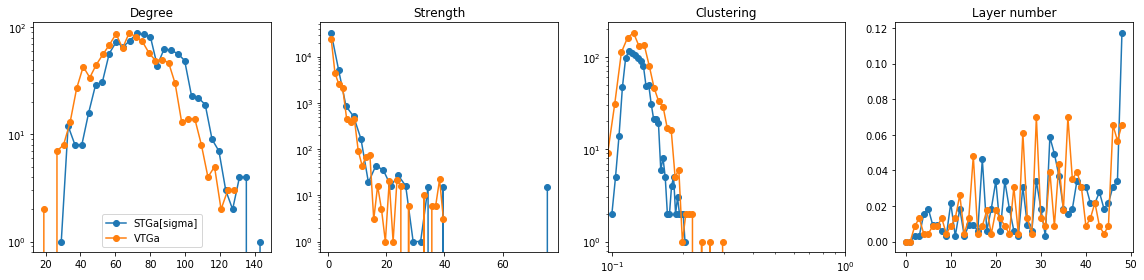

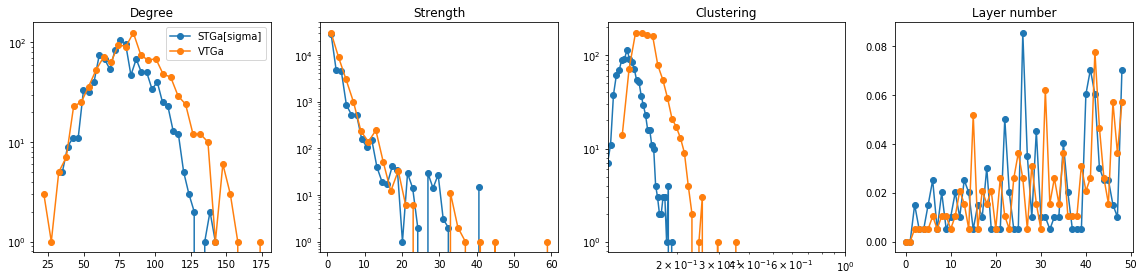

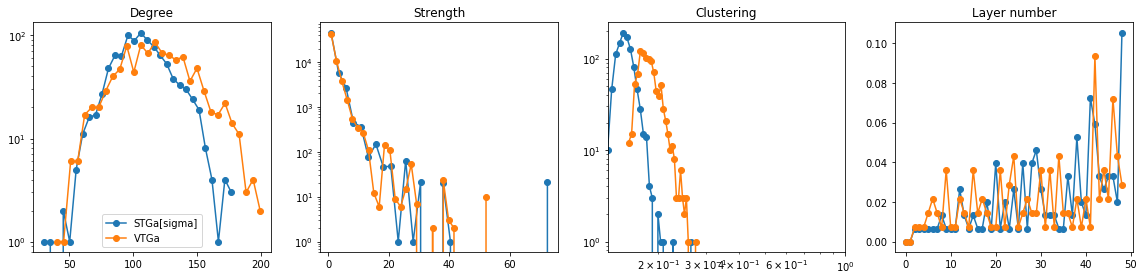

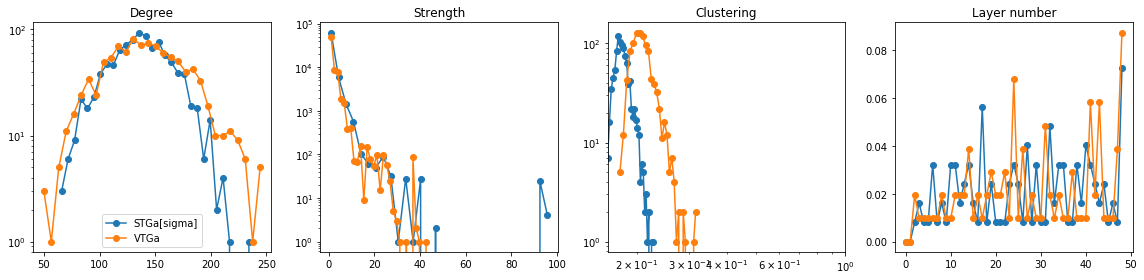

In [50]:
pl = 4 
for sigma in sigmas:
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1,pl,1)
    aa, bb = np.histogram(STGa[sigma].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='STGa[sigma]')
    aa, bb = np.histogram(VTGa[sigma].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='VTGa')
    plt.legend(loc=0)
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Degree')

    plt.subplot(1,pl,2)
    aa, bb = np.histogram(nx.get_edge_attributes(STGa[sigma],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.get_edge_attributes(VTGa[sigma],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Strength')

    plt.subplot(1,pl,3)
    aa, bb = np.histogram(nx.clustering(STGa[sigma]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.clustering(VTGa[sigma]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Clustering')
    plt.xlim(0,1)

    plt.subplot(1,pl,4)
    coreness, layerness = sad.onion_decomposition(STGa[sigma])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    coreness, layerness = sad.onion_decomposition(VTGa[sigma])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    plt.title('Layer number')

    plt.tight_layout()

In [33]:
STGa[sigmas[-1]].number_of_edges(), VTGa[sigmas[-1]].number_of_edges()

(128224, 151426)

Text(0.5,0,u'Clustering NTG')

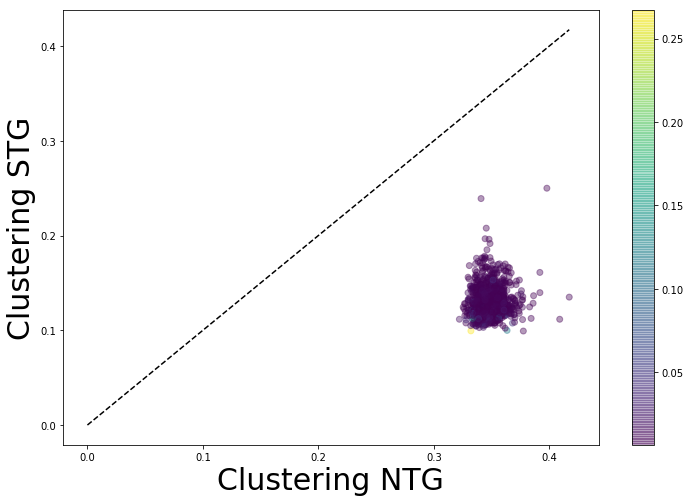

In [16]:
x = nx.clustering(VTGa[sigmas[-1]]).values()
y = nx.clustering(STGa).values()
z = act.values()[:N]
M = np.max([np.max(x), np.max(y)])

fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,c=z,alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Clustering STG',fontsize=30)
plt.xlabel('Clustering NTG', fontsize=30)


Text(0.5,0,u'Layer NTG')

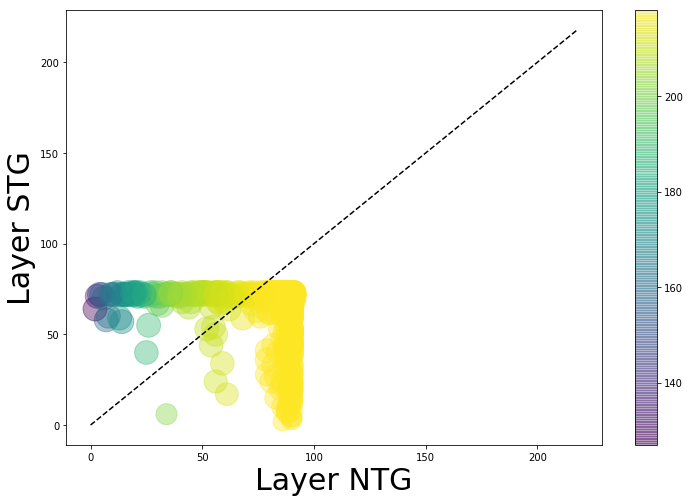

In [37]:
x, x0 = sad.onion_decomposition(VTGa[sigmas[-1]])
y, y0 = sad.onion_decomposition(STGa[sigmas[-1]])
z = act.values()[:N]
M = np.max([np.max(x.values()), np.max(y.values())])

fig = plt.figure(figsize=(12,8))
plt.scatter(x0.values(),y0.values(),c=x.values(),s=3*np.array(y.values()),alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Layer STG',fontsize=30)
plt.xlabel('Layer NTG', fontsize=30)


- coreness network vs simplicial  (N>> now, act bassa, tempi lunghi, densita' bassa)
- coreness APS vs activity driven vs SAD 
- complex contagion cascade (https://arxiv.org/pdf/1207.1206.pdf)
- voter model (sims)
- omologia APS (???) 

